# TalkingData Mobile User Demographics - 3rd place solution

In this competition, Kagglers are challenged to build a model predicting users’ demographic characteristics based on their app usage, geolocation, and mobile device properties. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

https://www.kaggle.com/c/talkingdata-mobile-user-demographics

## Overview of the data

#### gender_age_train.csv, gender_age_test.csv -- the training and test set

train shape: (74645, 3), test shape: (112071, 0)
                     gender  age   group
device_id                               
-8076087639492063270      M   35  M32-38
-2897161552818060146      M   35  M32-38
-8260683887967679142      M   35  M32-38
-4938849341048082022      M   30  M29-31
 245133531816851882       M   30  M29-31


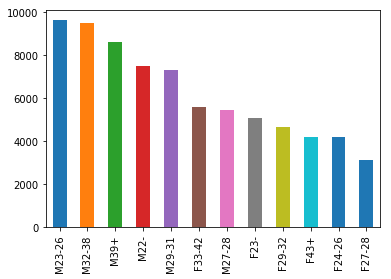

In [26]:
import os
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack

datadir = '../input'
gatrain = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'), index_col='device_id')
gatest = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'), index_col = 'device_id')
print('train shape: {}, test shape: {}'.format(gatrain.shape, gatest.shape))
print(gatrain.head())
gatrain['group'].value_counts().plot.bar()


In [28]:
phone = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'))
phone = phone.drop_duplicates('device_id',keep='first').set_index('device_id')
print(phone.shape)
phone.head()

(186716, 2)


,phone_brand,device_model
device_id,,
-8890648629457979026,小米,红米
1277779817574759137,小米,MI 2
5137427614288105724,三星,Galaxy S4
3669464369358936369,SUGAR,时尚手机
-5019277647504317457,三星,Galaxy Note 2


In [32]:
events = pd.read_csv(os.path.join(datadir,'events.csv'),  parse_dates=['timestamp'], index_col='event_id')
appevents = pd.read_csv(os.path.join(datadir,'app_events.csv'), usecols=['event_id','app_id','is_active'], dtype={'is_active':bool})
applabels = pd.read_csv(os.path.join(datadir,'app_labels.csv'))
print('evnets shape: {}, appevents shape: {}, applabels shape: {}'.format(events.shape, appevents.shape, applabels.shape))

evnets shape: (3252950, 4), appevents shape: (32473067, 3), applabels shape: (459943, 2)


,event_id,app_id,is_active
0,2,5927333115845830913,True
1,2,-5720078949152207372,False
2,2,-1633887856876571208,False
3,2,-653184325010919369,True
4,2,8693964245073640147,True


In [35]:
appevents.head()

,event_id,app_id,is_active
0,2,5927333115845830913,True
1,2,-5720078949152207372,False
2,2,-1633887856876571208,False
3,2,-653184325010919369,True
4,2,8693964245073640147,True


In [34]:
events.head()

,device_id,timestamp,longitude,latitude
event_id,,,,
1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [ ]:

#### events.csv, app_events.csv
when a user uses TalkingData SDK, the event gets logged in this data. Each event has an event id, location (lat/long), and the event corresponds to a list of apps in app_events.
timestamp: when the user is using an app with TalkingData SDK

#### app_labels.csv
apps and their labels, the label_id's can be used to join with label_categories

#### label_categories.csv
apps' labels and their categories in text

#### phone_brand_device_model.csv
device ids, brand, and models

#### phone_brand

三星 samsung  
天语 Ktouch  
海信 hisense  
联想 lenovo  
欧比 obi  
爱派尔 ipair  
努比亚 nubia  
优米 youmi  
朵唯 dowe  
黑米 heymi  
锤子 hammer  
酷比魔方 koobee  
美图 meitu  
尼比鲁 nibilu  
一加 oneplus  
优购 yougo  
诺基亚 nokia  
... others